In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("DATA/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


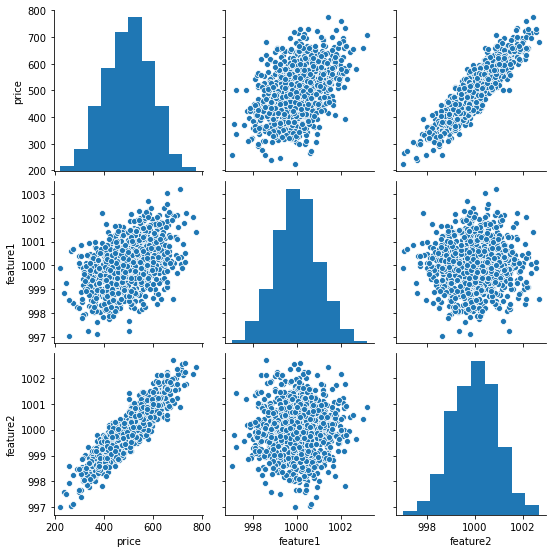

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values

In [7]:
y = df['price'].values

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perfor

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.


In [25]:
model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [28]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

# Choosing optimizer and loss function. 
# Multiclass classification = categorical_crossentropy
# Binary classificaiton = binary_crossentropy
# Regression = mse
model.compile(optimizer='rmsprop', loss='mse')

In [29]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 2ms/step - loss: 256834.7656
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256718.9688
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256618.9688
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256509.3750
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256390.3594
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256263.3438
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256121.6406
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255961.9844
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255778.9062
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255568.7969
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255327.9375
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 2316.8081
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 2284.6550
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 2248.8901
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 2219.1116
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 2179.7681
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 2145.0161
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 2105.9148
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 2069.9512
Epoch 104/250
22/22 [==============================] - 0s 3ms/step - loss: 2030.3739
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 1996.3824
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 1959.6184
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 1926.68

22/22 [==============================] - 0s 3ms/step - loss: 53.8263
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 50.2971
Epoch 195/250
22/22 [==============================] - 0s 3ms/step - loss: 46.7761
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 43.9590
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 41.6690
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 39.4053
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 37.6262
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 35.9642
Epoch 201/250
22/22 [==============================] - 0s 3ms/step - loss: 33.5894
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 32.0111
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 30.9351
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 29.7375
Epoch 205/250
22/2

In [31]:
loss_df = pd.DataFrame(model.history.history)

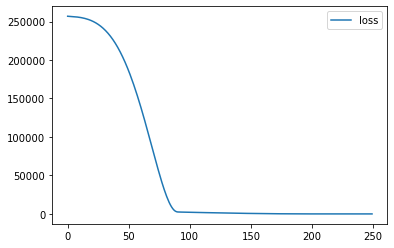

In [32]:
loss_df.plot()

In [33]:
model.evaluate(X_test, y_test, verbose=0)

24.957365036010742

In [34]:
model.evaluate(X_train, y_train, verbose=0)

23.881690979003906

In [40]:
test_predictions = model.predict(X_test)

In [36]:
test_predictions

array([[405.1929 ],
       [623.50525],
       [592.0804 ],
       [572.19543],
       [366.5437 ],
       [579.1375 ],
       [515.02124],
       [459.01263],
       [549.2072 ],
       [447.4188 ],
       [611.74725],
       [548.8555 ],
       [419.0098 ],
       [408.7823 ],
       [651.17914],
       [437.20193],
       [508.3563 ],
       [659.9376 ],
       [662.5733 ],
       [565.4728 ],
       [334.1286 ],
       [444.75076],
       [382.43652],
       [378.6492 ],
       [566.5472 ],
       [610.5727 ],
       [532.33575],
       [427.76688],
       [655.44   ],
       [413.9738 ],
       [442.5369 ],
       [485.05414],
       [438.32474],
       [681.8468 ],
       [424.64413],
       [417.60797],
       [501.82132],
       [550.4176 ],
       [509.69385],
       [395.29102],
       [618.54816],
       [416.525  ],
       [604.4036 ],
       [445.85046],
       [501.921  ],
       [581.632  ],
       [668.9521 ],
       [490.31723],
       [318.44186],
       [485.35715],


In [41]:
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis = 1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [42]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.192902
1,624.156198,623.505249
2,582.455066,592.080383
3,578.588606,572.195435
4,371.224104,366.543701
...,...,...
295,525.704657,528.999207
296,502.909473,515.323242
297,612.727910,609.609314
298,417.569725,416.845154


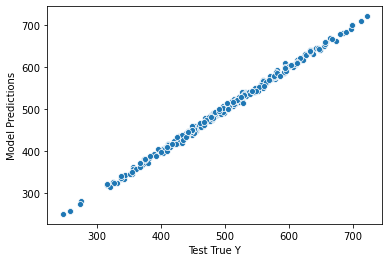

In [44]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

3.999584308900462

In [48]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [49]:
# Shows our average error is only off by <1%, so doing very well!
# Must take into account the mean values and actual distribution of your 
# label data when calculating how well you are doing 

In [50]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

24.95736761368683

In [51]:
np.sqrt(mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions']))

4.995734942296962

In [52]:
new_gem = [[998,1000]]

In [53]:
new_gem = scaler.transform(new_gem)

In [54]:
model.predict(new_gem)

array([[419.62643]], dtype=float32)

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save('my_gem_model.h5')

In [57]:
later_model = load_model('my_gem_model.h5')

In [58]:
later_model.predict(new_gem)

array([[419.62643]], dtype=float32)